In [52]:
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import statistics
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split

df = pd.read_csv('Offenses_NYC_2014.csv')
df2 = pd.read_csv('Offenses_NYC_2013.csv')
df.isnull().values.any() 

df.rename(index=str, columns={"Property crime": "PropertyCrime"},  inplace = True)

In [54]:
df = df.drop(df.index[227])
df = df.drop(df.index[363])

df2 = df2.drop(df2.index[216])

In [55]:
rob=df['Robbery']
pop=df['Population']
square=df['Population']**2
df['Population Squared']=square
murder=df['Murder and nonnegligent manslaughter']

In [56]:
count=0
rob=rob*1
for num in rob:
    if num > 0:
     rob[count]=1
    count +=1
df['rob']=rob

count=0
murder=murder*1
for num in murder:
    if num > 0:
     murder[count]=1
    count +=1
df['murder']=murder

burg=df['Burglary']
count=0
burg=burg*1
for num in burg:
    if num > 0:
     burg[count]=1
    count +=1
df['burglary']=burg

assault=df['Aggravated assault']
count=0
assault=assault*1
for num in assault:
    if num > 0:
     assault[count]=1
    count +=1
df['Agg. Assault']=assault

theft=df['Larceny-theft']
count=0
theft=theft*1
for num in theft:
    if num > 0:
     theft[count]=1
    count +=1
df['larceny']=theft



In [57]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition)2,Robbery,Aggravated assault,PropertyCrime,Burglary,Larceny-theft,Motor vehicle theft,Arson3,Population Squared,rob,murder,burglary,Agg. Assault,larceny
0,Adams Village,1851.0,0.0,0.0,NaN,0.0,0.0,0.0,11.0,1.0,10.0,0.0,0.0,3.426201e+06,0.0,0.0,1.0,0.0,1.0
1,Addison Town and Village,2568.0,2.0,0.0,NaN,0.0,1.0,1.0,49.0,1.0,47.0,1.0,0.0,6.594624e+06,1.0,0.0,1.0,1.0,1.0
2,Afton Village4,820.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.724000e+05,0.0,0.0,0.0,0.0,1.0
3,Akron Village,2842.0,1.0,0.0,NaN,0.0,0.0,1.0,17.0,0.0,17.0,0.0,0.0,8.076964e+06,0.0,0.0,0.0,1.0,1.0
4,Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,3083.0,122.0,12.0,9.720974e+09,1.0,1.0,1.0,1.0,1.0


In [59]:
regr = linear_model.LinearRegression()
Y = df['PropertyCrime'].values.reshape(-1, 1)
X = df[['Population','Population Squared','rob','murder']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[9.51829747e-03 1.18331259e-07 9.86630673e+01 2.77208015e+02]]

Intercept: 
 [-11.18600825]

R-squared:
0.8399435640661663


In [66]:
features = ['Burglary','Murder and nonnegligent manslaughter', 'Robbery']
fx = df.loc[:, features].values
fx = StandardScaler().fit_transform(fx)

fx2 = df2.loc[:, features].values
fx2 = StandardScaler().fit_transform(fx2)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(fx)

pca2 = PCA(n_components=2)
principalComponents2 = pca.fit_transform(fx2)


C:\Users\ihemb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [68]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])


principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['principal_component_1', 'principal_component_2'])

In [75]:
regr = linear_model.LinearRegression()
Y = df['PropertyCrime'].values.reshape(-1, 1)
X = principalDf[['principal_component_1','principal_component_2']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  531.28042499 -1035.29413802]]

Intercept: 
 [330.38147139]

R-squared:
0.9568805072964774


In [76]:
regr2 = linear_model.LinearRegression()
Y2 = df2['Property crime'].values.reshape(-1, 1)
X2 = principalDf2[['principal_component_1','principal_component_2']]
regr2.fit(X2, Y2)

# Inspect the results.
print('\nCoefficients: \n', regr2.coef_)
print('\nIntercept: \n', regr2.intercept_)
print('\nR-squared:')
print(regr2.score(X2, Y2))


Coefficients: 
 [[ 576.78370509 -970.38405306]]

Intercept: 
 [385.75216138]

R-squared:
0.9499978806745598


In [37]:
df.rename(index=str, columns={"Property crime": "PropertyCrime"},  inplace = True)
linear_formula = 'PropertyCrime ~ principal_component_1 + principal_component_2'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()

In [16]:
lm.params

Intercept                 393.408783
principal_component_1     792.859761
principal_component_2    5627.232610
dtype: float64

In [17]:
lm.pvalues

Intercept                1.233791e-66
principal_component_1    2.343312e-07
principal_component_2    1.288094e-35
dtype: float64

In [18]:
lm.rsquared

0.9417844113557867

In [78]:
#X_train, X_test, y_train, y_test = train_test_split( x, Y, test_size=0.33, random_state=42)
print('With 2013 data: ' + str(bnb.fit(X, Y).score(X2, Y2)))
print('Testing on 2014: ' + str(bnb.fit(X, Y).score(X, Y)))

With 2013 data: 0.008645533141210375
Testing on 2014: 0.035422343324250684


C:\Users\ihemb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


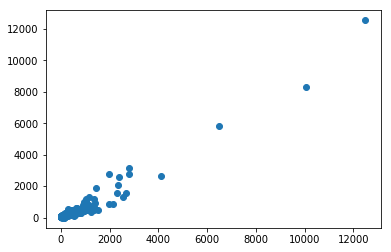

In [83]:
predictions = regr.predict(X2)

plt.scatter(Y2, predictions)
plt.show()